In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('phishing.csv')

In [5]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
len(data.columns)

32

In [8]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

## Input and Predictor

In [9]:
X = data.drop(["class","Index"],axis =1)
y = data["class"]

## Correlation Analysis

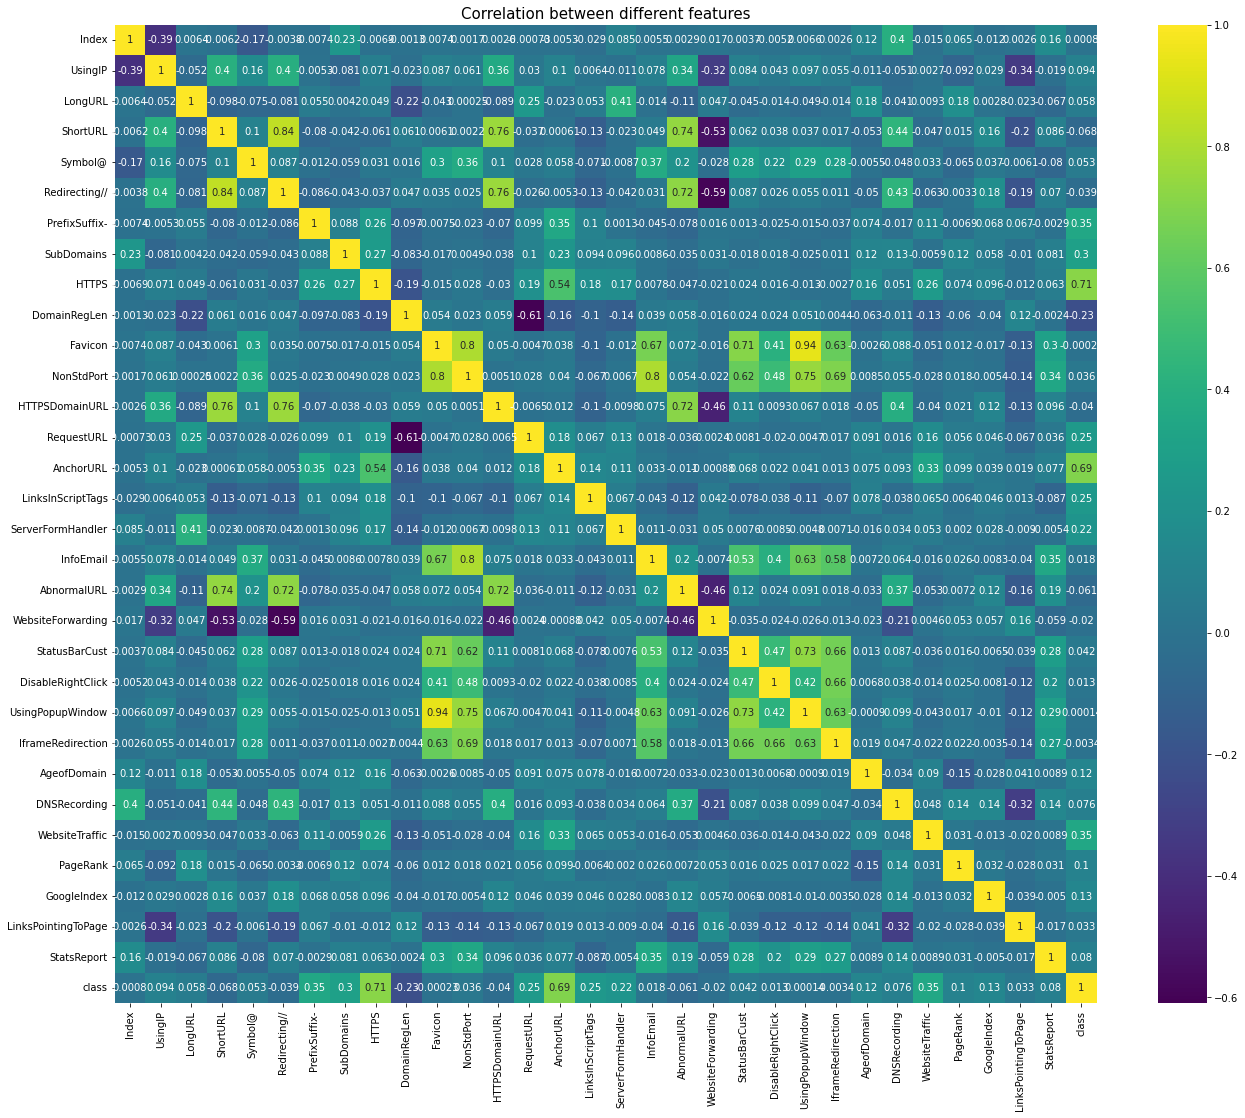

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(22, 18))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [11]:
corr=data.corr()
corr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,1.000000,-0.388620,0.006441,-0.006221,-0.169437,-0.003771,-0.007402,0.233936,-0.006899,-0.001290,...,0.006593,0.002583,0.115175,0.400751,-0.015147,0.065034,-0.012466,0.002623,0.163479,0.000802
UsingIP,-0.388620,1.000000,-0.052159,0.403547,0.158766,0.397220,-0.005306,-0.080921,0.071255,-0.022830,...,0.096953,0.054739,-0.010580,-0.050929,0.002728,-0.091857,0.029206,-0.338971,-0.019420,0.094033
LongURL,0.006441,-0.052159,1.000000,-0.097976,-0.075205,-0.080788,0.055334,0.004249,0.049033,-0.221807,...,-0.049486,-0.013902,0.179678,-0.040549,0.009296,0.183672,0.002825,-0.023216,-0.066708,0.057661
ShortURL,-0.006221,0.403547,-0.097976,1.000000,0.104433,0.843149,-0.080458,-0.041874,-0.061383,0.060950,...,0.036599,0.016570,-0.052562,0.436163,-0.047025,0.014612,0.155832,-0.198463,0.085572,-0.067931
Symbol@,-0.169437,0.158766,-0.075205,0.104433,1.000000,0.087086,-0.011711,-0.058931,0.031275,0.015549,...,0.290880,0.284401,-0.005459,-0.047820,0.032981,-0.064714,0.037047,-0.006124,-0.080286,0.052994


In [12]:
corr['class']=abs(corr['class'])
corr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,1.000000,-0.388620,0.006441,-0.006221,-0.169437,-0.003771,-0.007402,0.233936,-0.006899,-0.001290,...,0.006593,0.002583,0.115175,0.400751,-0.015147,0.065034,-0.012466,0.002623,0.163479,0.000802
UsingIP,-0.388620,1.000000,-0.052159,0.403547,0.158766,0.397220,-0.005306,-0.080921,0.071255,-0.022830,...,0.096953,0.054739,-0.010580,-0.050929,0.002728,-0.091857,0.029206,-0.338971,-0.019420,0.094033
LongURL,0.006441,-0.052159,1.000000,-0.097976,-0.075205,-0.080788,0.055334,0.004249,0.049033,-0.221807,...,-0.049486,-0.013902,0.179678,-0.040549,0.009296,0.183672,0.002825,-0.023216,-0.066708,0.057661
ShortURL,-0.006221,0.403547,-0.097976,1.000000,0.104433,0.843149,-0.080458,-0.041874,-0.061383,0.060950,...,0.036599,0.016570,-0.052562,0.436163,-0.047025,0.014612,0.155832,-0.198463,0.085572,0.067931
Symbol@,-0.169437,0.158766,-0.075205,0.104433,1.000000,0.087086,-0.011711,-0.058931,0.031275,0.015549,...,0.290880,0.284401,-0.005459,-0.047820,0.032981,-0.064714,0.037047,-0.006124,-0.080286,0.052994


In [13]:
incCorr=corr.sort_values(by='class',ascending=False)
incCorr.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
class,0.000802,0.094033,0.057661,-0.067931,0.052994,-0.038885,0.348588,0.298231,0.714704,-0.225879,...,0.000136,-0.003362,0.121402,0.075579,0.346003,0.104593,0.129000,0.032694,0.079632,1.000000
HTTPS,-0.006899,0.071255,0.049033,-0.061383,0.031275,-0.036536,0.261366,0.267531,1.000000,-0.193730,...,-0.012945,-0.002734,0.162700,0.050797,0.258625,0.074479,0.096110,-0.011569,0.063126,0.714704
AnchorURL,-0.005275,0.099701,-0.023153,0.000607,0.057968,-0.005341,0.348854,0.229374,0.535712,-0.160355,...,0.041211,0.013441,0.075393,0.093131,0.326172,0.099201,0.038866,0.018788,0.077115,0.692895
PrefixSuffix-,-0.007402,-0.005306,0.055334,-0.080458,-0.011711,-0.085709,1.000000,0.087852,0.261366,-0.096826,...,-0.014716,-0.036894,0.074083,-0.016610,0.110555,-0.006855,0.067796,0.067469,-0.002851,0.348588
WebsiteTraffic,-0.015147,0.002728,0.009296,-0.047025,0.032981,-0.062761,0.110555,-0.005948,0.258625,-0.134571,...,-0.043126,-0.022037,0.089814,0.048450,1.000000,0.030905,-0.012529,-0.019701,0.008878,0.346003


In [14]:
incCorr['class']

class                  1.000000
HTTPS                  0.714704
AnchorURL              0.692895
PrefixSuffix-          0.348588
WebsiteTraffic         0.346003
SubDomains             0.298231
RequestURL             0.253478
LinksInScriptTags      0.248415
DomainRegLen           0.225879
ServerFormHandler      0.221380
GoogleIndex            0.129000
AgeofDomain            0.121402
PageRank               0.104593
UsingIP                0.094033
StatsReport            0.079632
DNSRecording           0.075579
ShortURL               0.067931
AbnormalURL            0.060751
LongURL                0.057661
Symbol@                0.052994
StatusBarCust          0.041878
HTTPSDomainURL         0.040096
Redirecting//          0.038885
NonStdPort             0.036461
LinksPointingToPage    0.032694
WebsiteForwarding      0.020151
InfoEmail              0.018039
DisableRightClick      0.012675
IframeRedirection      0.003362
Index                  0.000802
Favicon                0.000231
UsingPop

In [15]:
tenfeatures=incCorr[1:11].index
twenfeatures=incCorr[1:21].index

In [16]:
#Structutre to Store metrics
ML_Model = []
accuracy = []
f1_score = []
precision = []

def storeResults(model, a,b,c):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    precision.append(round(c, 3))

## KNN (Non Learning Based)

In [17]:
def KNN(X):
    x=[a for a in range(1,10,2)]
    knntrain=[]
    knntest=[]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    X_train.shape, y_train.shape, X_test.shape, y_test.shape
    for i in range(1,10,2):
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_train_knn = knn.predict(X_train)
        y_test_knn = knn.predict(X_test)
        acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
        acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
        print("K-Nearest Neighbors with k={}: Accuracy on training Data: {:.3f}".format(i,acc_train_knn))
        print("K-Nearest Neighbors with k={}: Accuracy on test Data: {:.3f}".format(i,acc_test_knn))
        knntrain.append(acc_train_knn)
        knntest.append(acc_test_knn)
        print()
    plt.plot(x,knntrain,label="Train accuracy")
    plt.plot(x,knntest,label="Test accuracy")
    plt.legend()
    plt.show()

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.989
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.956

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.976
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.946

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.965
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.941

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.958
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.936

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.953
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.938



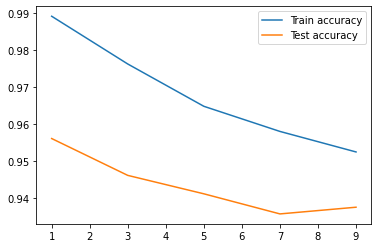

In [18]:
Xmain=X
Xten=X[tenfeatures]
Xtwen=X[twenfeatures]

KNN(Xmain)

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.943
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.928

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.946
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.933

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.947
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.936

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.946
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.938

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.944
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.935



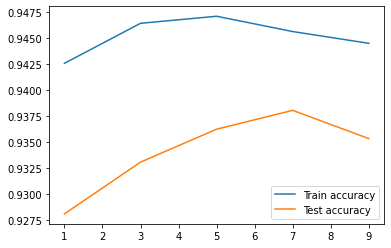

In [19]:
KNN(Xten)

K-Nearest Neighbors with k=1: Accuracy on training Data: 0.981
K-Nearest Neighbors with k=1: Accuracy on test Data: 0.951

K-Nearest Neighbors with k=3: Accuracy on training Data: 0.970
K-Nearest Neighbors with k=3: Accuracy on test Data: 0.940

K-Nearest Neighbors with k=5: Accuracy on training Data: 0.960
K-Nearest Neighbors with k=5: Accuracy on test Data: 0.942

K-Nearest Neighbors with k=7: Accuracy on training Data: 0.956
K-Nearest Neighbors with k=7: Accuracy on test Data: 0.939

K-Nearest Neighbors with k=9: Accuracy on training Data: 0.950
K-Nearest Neighbors with k=9: Accuracy on test Data: 0.938



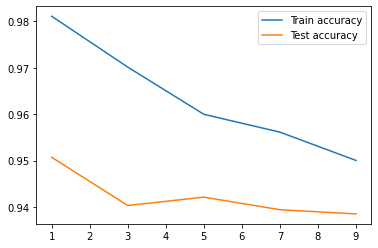

In [20]:
KNN(Xtwen)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)

In [22]:
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,precision_score_train_knn)

## SVM

In [23]:
def SVM(X, y):
    x=[a for a in range(1,10,2)]
    svmtrain=[]
    svmtest=[]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    X_train.shape, y_train.shape, X_test.shape, y_test.shape
    from sklearn.svm import SVC
    for i in range(1,10,2):
        svm = SVC(kernel='linear', C=i)
        svm.fit(X_train, y_train)
        y_train_svm = svm.predict(X_train)
        y_test_svm = svm.predict(X_test)
        acc_train_svm = metrics.accuracy_score(y_train, y_train_svm)
        acc_test_svm = metrics.accuracy_score(y_test, y_test_svm)
        print("SVM with C={}: Accuracy on training Data: {:.3f}".format(i,acc_train_svm))
        print("SVM with C={}: Accuracy on test Data: {:.3f}".format(i,acc_test_svm))
        svmtrain.append(acc_train_svm)
        svmtest.append(acc_test_svm)
        print()
    import matplotlib.pyplot as plt
    plt.plot(x,svmtrain,label="Train accuracy")
    plt.plot(x,svmtest,label="Test accuracy")
    plt.legend()
    plt.show()

SVM with C=1: Accuracy on training Data: 0.926
SVM with C=1: Accuracy on test Data: 0.935

SVM with C=3: Accuracy on training Data: 0.926
SVM with C=3: Accuracy on test Data: 0.935

SVM with C=5: Accuracy on training Data: 0.926
SVM with C=5: Accuracy on test Data: 0.935

SVM with C=7: Accuracy on training Data: 0.926
SVM with C=7: Accuracy on test Data: 0.935

SVM with C=9: Accuracy on training Data: 0.926
SVM with C=9: Accuracy on test Data: 0.935



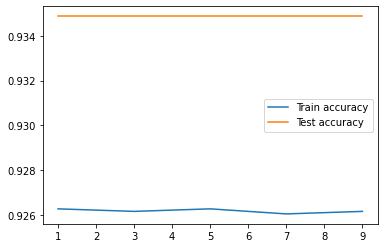

In [24]:
Xmain=X
Xten=X[tenfeatures]
Xtwen=X[twenfeatures]

SVM(Xmain,y)

SVM with C=1: Accuracy on training Data: 0.919
SVM with C=1: Accuracy on test Data: 0.925

SVM with C=3: Accuracy on training Data: 0.919
SVM with C=3: Accuracy on test Data: 0.925

SVM with C=5: Accuracy on training Data: 0.919
SVM with C=5: Accuracy on test Data: 0.925

SVM with C=7: Accuracy on training Data: 0.919
SVM with C=7: Accuracy on test Data: 0.925

SVM with C=9: Accuracy on training Data: 0.919
SVM with C=9: Accuracy on test Data: 0.925



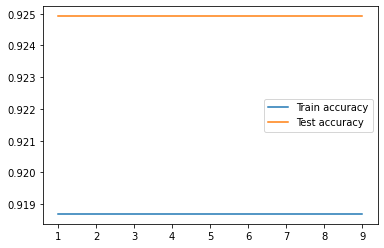

In [25]:
SVM(Xten,y)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)


y_train_svm = svm.predict(X_train)
y_test_svm = svm.predict(X_test)


acc_train_svm = metrics.accuracy_score(y_train, y_train_svm)
acc_test_svm = metrics.accuracy_score(y_test, y_test_svm)

f1_score_train_svm = metrics.f1_score(y_train, y_train_svm)
f1_score_test_svm = metrics.f1_score(y_test, y_test_svm)

precision_score_train_svm = metrics.precision_score(y_train, y_train_svm)
precision_score_test_svm = metrics.precision_score(y_test, y_test_svm)

print("SVM with C={}: Accuracy on training data: {:.3f}".format(1, acc_train_svm))
print("SVM with C={}: Accuracy on test data: {:.3f}".format(1, acc_test_svm))
print("SVM with C={}: F1 score on training data: {:.3f}".format(1, f1_score_train_svm))
print("SVM with C={}: F1 score on test data: {:.3f}".format(1, f1_score_test_svm))
print("SVM with C={}: Precision on training data: {:.3f}".format(1, precision_score_train_svm))
print("SVM with C={}: Precision on test data: {:.3f}".format(1, precision_score_test_svm))

SVM with C=1: Accuracy on training data: 0.926
SVM with C=1: Accuracy on test data: 0.935
SVM with C=1: F1 score on training data: 0.934
SVM with C=1: F1 score on test data: 0.942
SVM with C=1: Precision on training data: 0.926
SVM with C=1: Precision on test data: 0.930


In [27]:
storeResults('Support Vector Machines',acc_test_svm,f1_score_test_svm,precision_score_train_svm)

## Gradient Boost (Boosting Based)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [30]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [31]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,precision_score_train_gbc)

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974



## Comparision of Model Scores

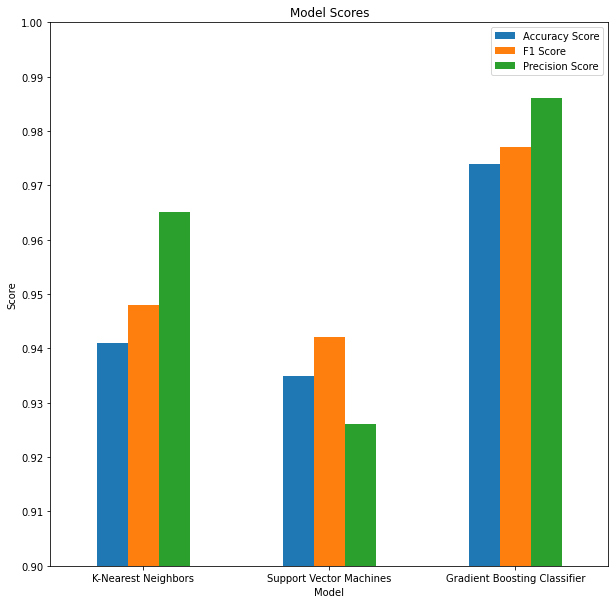

In [32]:
df = pd.DataFrame({
    'Modelname': ML_Model,
    'Accuracy Score': accuracy,
    'F1 Score': f1_score,
    'Precision Score': precision
})
df.set_index('Modelname', inplace=True)

# plot the scores for each model

fig, ax = plt.subplots(figsize=(10,10))
df.plot(kind='bar', ax=ax)
ax.set_xticklabels(df.index, rotation=0)
ax.set_ylim([0.9, 1])
ax.set_yticks([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Scores')
plt.show()

## Decoding URL

In [33]:
#pip install python-whois

In [1]:
import ipaddress
import re
import urllib.request
from bs4 import BeautifulSoup
import socket
import requests
import google
import whois
from datetime import date, datetime
import time
from dateutil.parser import parse as date_parse
from urllib.parse import urlparse

class FeatureExtraction:
    features = []
    def __init__(self,url):
        self.features = []
        self.url = url
        self.domain = ""
        self.whois_response = ""
        self.urlparse = ""
        self.response = ""
        self.soup = ""

        try:
            self.response = requests.get(url)
            self.soup = BeautifulSoup(response.text, 'html.parser')
        except:
            pass

        try:
            self.urlparse = urlparse(url)
            self.domain = self.urlparse.netloc
        except:
            pass

        try:
            self.whois_response = whois.whois(self.domain)
        except:
            pass


        

        self.features.append(self.UsingIp())
        self.features.append(self.longUrl())
        self.features.append(self.shortUrl())
        self.features.append(self.symbol())
        self.features.append(self.redirecting())
        self.features.append(self.prefixSuffix())
        self.features.append(self.SubDomains())
        self.features.append(self.Hppts())
        self.features.append(self.DomainRegLen())
        self.features.append(self.Favicon())
        

        self.features.append(self.NonStdPort())
        self.features.append(self.HTTPSDomainURL())
        self.features.append(self.RequestURL())
        self.features.append(self.AnchorURL())
        self.features.append(self.LinksInScriptTags())
        self.features.append(self.ServerFormHandler())
        self.features.append(self.InfoEmail())
        self.features.append(self.AbnormalURL())
        self.features.append(self.WebsiteForwarding())
        self.features.append(self.StatusBarCust())

        self.features.append(self.DisableRightClick())
        self.features.append(self.UsingPopupWindow())
        self.features.append(self.IframeRedirection())
        self.features.append(self.AgeofDomain())
        self.features.append(self.DNSRecording())
        self.features.append(self.WebsiteTraffic())
        self.features.append(self.PageRank())
        self.features.append(self.GoogleIndex())
        self.features.append(self.LinksPointingToPage())
        self.features.append(self.StatsReport())


     # 1.UsingIp
    def UsingIp(self):
        try:
            ipaddress.ip_address(self.url)
            return -1
        except:
            return 1

    # 2.longUrl
    def longUrl(self):
        if len(self.url) < 54:
            return 1
        if len(self.url) >= 54 and len(self.url) <= 75:
            return 0
        return -1

    # 3.shortUrl
    def shortUrl(self):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                    'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                    'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                    'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                    'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                    'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                    'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net', self.url)
        if match:
            return -1
        return 1

    # 4.Symbol@
    def symbol(self):
        if re.findall("@",self.url):
            return -1
        return 1
    
    # 5.Redirecting//
    def redirecting(self):
        if self.url.rfind('//')>6:
            return -1
        return 1
    
    # 6.prefixSuffix
    def prefixSuffix(self):
        try:
            match = re.findall('\-', self.domain)
            if match:
                return -1
            return 1
        except:
            return -1
    
    # 7.SubDomains
    def SubDomains(self):
        dot_count = len(re.findall("\.", self.url))
        if dot_count == 1:
            return 1
        elif dot_count == 2:
            return 0
        return -1

    # 8.HTTPS
    def Hppts(self):
        try:
            https = self.urlparse.scheme
            if 'https' in https:
                return 1
            return -1
        except:
            return 1

    # 9.DomainRegLen
    def DomainRegLen(self):
        try:
            expiration_date = self.whois_response.expiration_date
            creation_date = self.whois_response.creation_date
            try:
                if(len(expiration_date)):
                    expiration_date = expiration_date[0]
            except:
                pass
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            age = (expiration_date.year-creation_date.year)*12+ (expiration_date.month-creation_date.month)
            if age >=12:
                return 1
            return -1
        except:
            return -1

    # 10. Favicon
    def Favicon(self):
        try:
            for head in self.soup.find_all('head'):
                for head.link in self.soup.find_all('link', href=True):
                    dots = [x.start(0) for x in re.finditer('\.', head.link['href'])]
                    if self.url in head.link['href'] or len(dots) == 1 or domain in head.link['href']:
                        return 1
            return -1
        except:
            return -1

    # 11. NonStdPort
    def NonStdPort(self):
        try:
            port = self.domain.split(":")
            if len(port)>1:
                return -1
            return 1
        except:
            return -1

    # 12. HTTPSDomainURL
    def HTTPSDomainURL(self):
        try:
            if 'https' in self.domain:
                return -1
            return 1
        except:
            return -1
    
    # 13. RequestURL
    def RequestURL(self):
        try:
            for img in self.soup.find_all('img', src=True):
                dots = [x.start(0) for x in re.finditer('\.', img['src'])]
                if self.url in img['src'] or self.domain in img['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for audio in self.soup.find_all('audio', src=True):
                dots = [x.start(0) for x in re.finditer('\.', audio['src'])]
                if self.url in audio['src'] or self.domain in audio['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for embed in self.soup.find_all('embed', src=True):
                dots = [x.start(0) for x in re.finditer('\.', embed['src'])]
                if self.url in embed['src'] or self.domain in embed['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for iframe in self.soup.find_all('iframe', src=True):
                dots = [x.start(0) for x in re.finditer('\.', iframe['src'])]
                if self.url in iframe['src'] or self.domain in iframe['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success/float(i) * 100
                if percentage < 22.0:
                    return 1
                elif((percentage >= 22.0) and (percentage < 61.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1
    
    # 14. AnchorURL
    def AnchorURL(self):
        try:
            i,unsafe = 0,0
            for a in self.soup.find_all('a', href=True):
                if "#" in a['href'] or "javascript" in a['href'].lower() or "mailto" in a['href'].lower() or not (url in a['href'] or self.domain in a['href']):
                    unsafe = unsafe + 1
                i = i + 1

            try:
                percentage = unsafe / float(i) * 100
                if percentage < 31.0:
                    return 1
                elif ((percentage >= 31.0) and (percentage < 67.0)):
                    return 0
                else:
                    return -1
            except:
                return -1

        except:
            return -1

    # 15. LinksInScriptTags
    def LinksInScriptTags(self):
        try:
            i,success = 0,0
        
            for link in self.soup.find_all('link', href=True):
                dots = [x.start(0) for x in re.finditer('\.', link['href'])]
                if self.url in link['href'] or self.domain in link['href'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            for script in self.soup.find_all('script', src=True):
                dots = [x.start(0) for x in re.finditer('\.', script['src'])]
                if self.url in script['src'] or self.domain in script['src'] or len(dots) == 1:
                    success = success + 1
                i = i+1

            try:
                percentage = success / float(i) * 100
                if percentage < 17.0:
                    return 1
                elif((percentage >= 17.0) and (percentage < 81.0)):
                    return 0
                else:
                    return -1
            except:
                return 0
        except:
            return -1

    # 16. ServerFormHandler
    def ServerFormHandler(self):
        try:
            if len(self.soup.find_all('form', action=True))==0:
                return 1
            else :
                for form in self.soup.find_all('form', action=True):
                    if form['action'] == "" or form['action'] == "about:blank":
                        return -1
                    elif self.url not in form['action'] and self.domain not in form['action']:
                        return 0
                    else:
                        return 1
        except:
            return -1

    # 17. InfoEmail
    def InfoEmail(self):
        try:
            if re.findall(r"[mail\(\)|mailto:?]", self.soap):
                return -1
            else:
                return 1
        except:
            return -1

    # 18. AbnormalURL
    def AbnormalURL(self):
        try:
            if self.response.text == self.whois_response:
                return 1
            else:
                return -1
        except:
            return -1

    # 19. WebsiteForwarding
    def WebsiteForwarding(self):
        try:
            if len(self.response.history) <= 1:
                return 1
            elif len(self.response.history) <= 4:
                return 0
            else:
                return -1
        except:
             return -1

    # 20. StatusBarCust
    def StatusBarCust(self):
        try:
            if re.findall("<script>.+onmouseover.+</script>", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 21. DisableRightClick
    def DisableRightClick(self):
        try:
            if re.findall(r"event.button ?== ?2", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 22. UsingPopupWindow
    def UsingPopupWindow(self):
        try:
            if re.findall(r"alert\(", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 23. IframeRedirection
    def IframeRedirection(self):
        try:
            if re.findall(r"[<iframe>|<frameBorder>]", self.response.text):
                return 1
            else:
                return -1
        except:
             return -1

    # 24. AgeofDomain
    def AgeofDomain(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 25. DNSRecording    
    def DNSRecording(self):
        try:
            creation_date = self.whois_response.creation_date
            try:
                if(len(creation_date)):
                    creation_date = creation_date[0]
            except:
                pass

            today  = date.today()
            age = (today.year-creation_date.year)*12+(today.month-creation_date.month)
            if age >=6:
                return 1
            return -1
        except:
            return -1

    # 26. WebsiteTraffic   
    def WebsiteTraffic(self):
        try:
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find("REACH")['RANK']
            if (int(rank) < 100000):
                return 1
            return 0
        except :
            return -1

    # 27. PageRank
    def PageRank(self):
        try:
            prank_checker_response = requests.post("https://www.checkpagerank.net/index.php", {"name": self.domain})

            global_rank = int(re.findall(r"Global Rank: ([0-9]+)", rank_checker_response.text)[0])
            if global_rank > 0 and global_rank < 100000:
                return 1
            return -1
        except:
            return -1
            

    # 28. GoogleIndex
    def GoogleIndex(self):
        try:
            site = search(self.url, 5)
            if site:
                return 1
            else:
                return -1
        except:
            return 1

    # 29. LinksPointingToPage
    def LinksPointingToPage(self):
        try:
            number_of_links = len(re.findall(r"<a href=", self.response.text))
            if number_of_links == 0:
                return 1
            elif number_of_links <= 2:
                return 0
            else:
                return -1
        except:
            return -1

    # 30. StatsReport
    def StatsReport(self):
        try:
            url_match = re.search(
        'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly', url)
            ip_address = socket.gethostbyname(self.domain)
            ip_match = re.search('146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|46\.242\.145\.98|'
                                '107\.151\.148\.44|107\.151\.148\.107|64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|52\.69\.166\.231|216\.58\.192\.225|'
                                '118\.184\.25\.86|67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
                                '216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|195\.16\.127\.157|'
                                '34\.196\.13\.28|103\.224\.212\.222|172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
                                '216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42', ip_address)
            if url_match:
                return -1
            elif ip_match:
                return -1
            return 1
        except:
            return 1
    
    def getFeaturesList(self):
        return self.features

In [2]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

NameError: name 'GradientBoostingClassifier' is not defined

## Testing

In [7]:
import numpy as np
import pickle

In [8]:
with open('gbc_model02.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

C:\Users\ayush\anaconda3\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DummyClassifier from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [37]:
url="http://dir-business-reappeal-case-9845.surge.sh/"
#can provide any URL. this URL was taken from PhishTank
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30) 
y_pred =gbc.predict(x)[0]
if y_pred==1:
    print("We guess it is a safe website")
else:
    print("Caution! Suspicious website detected")

Caution! Suspicious website detected


In [9]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\ayush\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: sklearn
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pickle

In [97]:
with open('gbc_model.pkl', 'wb') as file:
    pickle.dump(gbc, file)

In [74]:
len(data['root_domain'].value_counts())

147571

In [84]:
import hashlib

def hash_encode(category):
    # Ensure 'category' is a string
    category_str = str(category)
    hash_object = hashlib.md5(category_str.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

data['root_domain'] = data['root_domain'].apply(hash_encode)
data['url_region'] = data['url_region'].apply(hash_encode)

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
from tld.exceptions import TldDomainNotFound, TldBadUrl, TldIOError
import logging
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# import whois
from sklearn.pipeline import Pipeline

In [90]:
x = data.drop(columns=['url_type'])
y = data['url_type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [91]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (439520, 10)
Y_train Shape : (439520,)
X_test  Shape : (188366, 10)
Y_test  Shape : (188366,)


In [92]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

In [93]:
results = []
for classifier in classifiers:
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    scores = cross_val_score(pipeline, x, y, cv=2, scoring='accuracy')
    y_pred = cross_val_predict(pipeline, x, y, cv=2)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='weighted')
    precision = precision_score(y, y_pred, average='weighted', zero_division=1) 
    f1 = f1_score(y, y_pred, average='weighted')
    results.append((classifier.__class__.__name__, accuracy, recall, precision, f1))

In [94]:
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
results = results.sort_values(by='Accuracy', ascending=False)
results.head()

,Classifier,Accuracy,Recall,Precision,F1-Score
4,ExtraTreesClassifier,0.805804,0.805804,0.734256,0.763455
1,RandomForestClassifier,0.805078,0.805078,0.732725,0.762428
0,DecisionTreeClassifier,0.798446,0.798446,0.741948,0.765255
3,KNeighborsClassifier,0.781844,0.781844,0.737307,0.753728
5,GaussianNB,0.676419,0.676419,0.711188,0.599275


In [95]:
pipeline = Pipeline([
        ('classifier', RandomForestClassifier())
    ])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [96]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    128308
           1       0.92      0.97      0.94     28491
           2       0.70      0.61      0.65     28058
           3       0.89      0.74      0.81      3509

    accuracy                           0.90    188366
   macro avg       0.86      0.82      0.84    188366
weighted avg       0.89      0.90      0.89    188366



In [97]:
import joblib
joblib.dump(pipeline,'saved_model.sav')

['saved_model.sav']

In [98]:
def get_numerical_values(url):
    url = url.replace('www.', '')
    url_len = get_url_length(url)
    letters_count = count_letters(url)
    digits_count  = count_digits(url)
    special_chars_count = count_special_chars(url)
    shortened = has_shortening_service(url)
    abnormal = abnormal_url(url)
    secure_https = secure_http(url)
    have_ip = have_ip_address(url)
    
    parsed_url  = urlparse(url)
    root_domain = parsed_url.netloc.split(".")[-2]
    url_region = get_url_region(root_domain)
    
    return {
        'url_len': url_len,
        'letters_count': letters_count,
        'digits_count': digits_count,
        'special_chars_count': special_chars_count,
        'shortened': shortened,
        'abnormal': abnormal,
        'secure_http': secure_https,
        'have_ip': have_ip,
        'url_region': hash_encode(url_region),
        'root_domain': hash_encode(root_domain)
    }

def get_url_length(url):
    return len(url)
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits
def count_special_chars(url):
    special_chars = "!@#$%^&*()_+-=[]{};:,.<>/?`~|"
    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars
def has_shortening_service(url):
    pattern = re.compile(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                         r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                         r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                         r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                         r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                         r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                         r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                         r'tr\.im|link\.zip\.net')
    match = pattern.search(url)
    return int(bool(match))
def abnormal_url(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname
    if hostname:
        hostname = str(hostname)
        match = re.search(hostname, url)
        if match:
            return 1
    return 0
def secure_http(url):
    scheme = urlparse(url).scheme
    if scheme == 'https':
        return 1
    else:
        return 0
def have_ip_address(url):
    pattern = r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.' \
              r'([01]?\d\d?|2[0-4]\d|25[0-5])\/)|' \
              r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)' \
              r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|' \
              r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)|' \
              r'((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)'

    match = re.search(pattern, url)
    if match:
        return 1
    else:
        return 0
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
    ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
    ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }
    
    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]
    
    return "Global"
def extract_root_domain(url):
    extracted = tldextract.extract(url)
    root_domain = extracted.domain
    return root_domain
def hash_encode(category):
    hash_object = hashlib.md5(category.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [101]:
# Example usage:
url = "http://pilot.eu.socialsmp.com/f7b1c5/84bb9bd5-d2b2-4db9-afdf-ac63726a1f39"
numerical_values = get_numerical_values(url)
print((numerical_values))

{'url_len': 73, 'letters_count': 42, 'digits_count': 19, 'special_chars_count': 12, 'shortened': 0, 'abnormal': 1, 'secure_http': 0, 'have_ip': 0, 'url_region': 32604616, 'root_domain': 63491499}
